In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import keras 
import tensorflow as tf
from keras.layers import Dropout
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.dummy import DummyClassifier

Using TensorFlow backend.


In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
###The following columns have no information provided, and they seems to be incosistent with what 
## some of the data columns in the columns already have
for x in data.columns:
    if x[-4:] == "Rate":
        data = data.drop(x, axis =1)
###The following data does not provide any relevance to the data as they are either 
### all have the same number, or the value does not provide any information
data = data.drop(["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18", "EducationField", 'Education', 'JobLevel'], axis =1 )

In [3]:
mapping = {"Yes": 1, "No":0}
data['StockOptionLevel'] = np.where(data['StockOptionLevel'] >0, 1,0)
data['OverTime'] = data['OverTime'].map(mapping)
data['Gender'] = np.where(data["Gender"] == "Male", 1,0)
data['BusinessTravel'] = np.where(data['BusinessTravel'] == 'Travel_Frequently', 1,0)
data['MaritalStatus'] = np.where(data['MaritalStatus'] == 'Single',0,1)
data['TotalJobSatisfcation'] = data['EnvironmentSatisfaction'] + data['JobSatisfaction'] + data['RelationshipSatisfaction']
data = data.drop(['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating'], axis =1 )

In [4]:
role_to_salary = {}
for x in data['JobRole'].unique():
    subset = data[data['JobRole'] == x]
    role_to_salary[x] = np.mean(subset['MonthlyIncome'])

data['JobRole'] = data['JobRole'].map(role_to_salary)


department_to_salary = {}
for x in data['Department'].unique():
    subset = data[data['Department'] == x]
    department_to_salary[x] = np.mean(subset['MonthlyIncome'])

data['Department'] = data['Department'].map(department_to_salary)

In [5]:
# categorical = list(data.drop(['Attrition'], axis =1).describe(include = ['O']).columns)
numerical = list(data.describe().columns)
x = data[numerical].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = numerical
# for x in categorical:
#     df[x] = data[x]
# df = pd.get_dummies(df, columns = categorical)
mapping = {"Yes": 1, "No":0}
df["Attrition"] = data["Attrition"].map(mapping)
X = df.drop("Attrition", axis =1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle = True, stratify = y)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42, shuffle = True, stratify = y_train)

In [6]:
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
print('train')
print(classification_report(y_train, dummy_clf.predict(X_train)))
print('test')
print(classification_report(y_test, dummy_clf.predict(X_test)))

train
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       863
           1       0.00      0.00      0.00       166

    accuracy                           0.84      1029
   macro avg       0.42      0.50      0.46      1029
weighted avg       0.70      0.84      0.77      1029

test
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
svc = SVC(kernel="linear", C =1, probability= True).fit(X_train, y_train)
print('train')
print(classification_report(y_train, svc.predict(X_train)))
print('test')
print(classification_report(y_test, svc.predict(X_test)))

train
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       863
           1       0.88      0.40      0.55       166

    accuracy                           0.89      1029
   macro avg       0.89      0.69      0.74      1029
weighted avg       0.89      0.89      0.88      1029

test
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       370
           1       0.83      0.42      0.56        71

    accuracy                           0.89       441
   macro avg       0.87      0.70      0.75       441
weighted avg       0.89      0.89      0.88       441



In [15]:
index = np.where(svc.predict(X_test) ==1)

In [17]:
len(index[0])

36

In [13]:
sum(y_test.iloc[index])

30

In [18]:
len(y_test)

441

In [656]:
list(zip(list(X_train.columns), svc.coef_[0]))

[('Age', -1.1702826940198803),
 ('BusinessTravel', 0.6956480875197286),
 ('Department', 0.5457153870831988),
 ('DistanceFromHome', 0.674852644171164),
 ('Gender', 0.1288764888692624),
 ('JobInvolvement', -0.858109687750372),
 ('JobRole', -0.9689650948879223),
 ('MaritalStatus', -0.09619114111732685),
 ('MonthlyIncome', 0.01265262733752437),
 ('NumCompaniesWorked', 1.0273659479738066),
 ('OverTime', 1.041431318501914),
 ('PercentSalaryHike', 0.1005654949384096),
 ('StockOptionLevel', -0.7842926573758184),
 ('TotalWorkingYears', -1.2313242874890167),
 ('TrainingTimesLastYear', -0.4892138701975559),
 ('WorkLifeBalance', -0.5686634812869675),
 ('YearsAtCompany', -0.40124367618727885),
 ('YearsInCurrentRole', -1.2022445678776261),
 ('YearsSinceLastPromotion', 1.707096049398664),
 ('YearsWithCurrManager', -0.7036201180812487),
 ('TotalJobSatisfcation', -1.955425340067796)]

In [698]:
lr = LogisticRegression().fit(X_train, y_train)
print('train')
print(classification_report(y_train, lr.predict(X_train)))
print('test')
print(classification_report(y_test, lr.predict(X_test)))

train
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       863
           1       0.85      0.41      0.55       166

    accuracy                           0.89      1029
   macro avg       0.87      0.70      0.75      1029
weighted avg       0.89      0.89      0.88      1029

test
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       370
           1       0.73      0.38      0.50        71

    accuracy                           0.88       441
   macro avg       0.81      0.68      0.72       441
weighted avg       0.87      0.88      0.86       441



In [693]:
lra = LogisticRegression(class_weight = {0:.85, 1:0.15}).fit(X_train, y_train)
print('train')
print(classification_report(y_train, lra.predict(X_train)))
print('test')
print(classification_report(y_test, lra.predict(X_test)))

train
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       863
           1       1.00      0.01      0.01       166

    accuracy                           0.84      1029
   macro avg       0.92      0.50      0.46      1029
weighted avg       0.87      0.84      0.77      1029

test
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.03      0.05        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.48       441
weighted avg       0.87      0.84      0.78       441



In [695]:
np.unique(lra.predict(X_test), return_counts = True)

(array([0, 1]), array([439,   2]))

In [696]:
np.unique(y_test, return_counts = True)

(array([0, 1]), array([370,  71]))

In [659]:
clf = xgb.XGBClassifier(max_depth =3, n_estimators = 100, scale_pos_weight = 4)
clf.fit(X_train,y_train)
print('train')
print(classification_report(y_train, clf.predict(X_train)))
print('test')
print(classification_report(y_test, clf.predict(X_test)))

train
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       863
           1       0.94      0.99      0.96       166

    accuracy                           0.99      1029
   macro avg       0.97      0.99      0.98      1029
weighted avg       0.99      0.99      0.99      1029

test
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       370
           1       0.43      0.44      0.43        71

    accuracy                           0.82       441
   macro avg       0.66      0.66      0.66       441
weighted avg       0.82      0.82      0.82       441



In [660]:
from sklearn.ensemble import VotingClassifier

In [661]:
vc = VotingClassifier(estimators=[
    ('svc', SVC(kernel="linear", C =1, probability= True, class_weight = {0:0.85, 1:0.15})),
    ('clf', xgb.XGBClassifier(max_depth =1, n_estimators = 100, scale_pos_weight = 4)),
    ('lr', LogisticRegression(class_weight = {0:0.85, 1:0.15}))], voting='soft')

In [662]:
vc.fit(X_train, y_train)
print('train')
print(classification_report(y_train, vc.predict(X_train)))
print('test')
print(classification_report(y_test, vc.predict(X_test)))

train
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       863
           1       1.00      0.20      0.33       166

    accuracy                           0.87      1029
   macro avg       0.93      0.60      0.63      1029
weighted avg       0.89      0.87      0.83      1029

test
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.87      0.18      0.30        71

    accuracy                           0.86       441
   macro avg       0.87      0.59      0.61       441
weighted avg       0.86      0.86      0.82       441



In [642]:
vc = VotingClassifier(estimators=[
    ('svc', SVC(kernel="linear", C =1, probability= True, class_weight = 'balanced')),
    ('clf', xgb.XGBClassifier(max_depth =1, n_estimators = 100)),
    ('lr', LogisticRegression(class_weight = 'balanced'))], voting='soft')

In [643]:
vc.fit(X_train, y_train)
print('train')
print(classification_report(y_train, vc.predict(X_train)))
print('test')
print(classification_report(y_test, vc.predict(X_test)))

train
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       863
           1       0.79      0.57      0.66       166

    accuracy                           0.91      1029
   macro avg       0.86      0.77      0.81      1029
weighted avg       0.90      0.91      0.90      1029

test
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       370
           1       0.64      0.45      0.53        71

    accuracy                           0.87       441
   macro avg       0.77      0.70      0.73       441
weighted avg       0.86      0.87      0.86       441



In [405]:
class_weight = {0:0.85}
dropout = 0.4
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, kernel_initializer= 'he_normal',input_shape = (X.shape[1],)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(Dropout(dropout))
model.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(Dropout(dropout))
model.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(Dropout(dropout))
model.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(Dropout(dropout))
model.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(Dropout(dropout))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Precision()])
model.fit(X_train, y_train, epochs = 30, batch_size = 20, validation_split=0.1)

Train on 926 samples, validate on 103 samples
Epoch 1/30
926/926 [==============================] - 1s 1ms/step - loss: 0.7344 - precision_53: 0.1573 - val_loss: 0.5554 - val_precision_53: 0.1532
Epoch 2/30
926/926 [==============================] - 0s 171us/step - loss: 0.4941 - precision_53: 0.1702 - val_loss: 0.5130 - val_precision_53: 0.1780
Epoch 3/30
926/926 [==============================] - 0s 148us/step - loss: 0.4864 - precision_53: 0.1824 - val_loss: 0.4814 - val_precision_53: 0.1863
Epoch 4/30
926/926 [==============================] - 0s 141us/step - loss: 0.4934 - precision_53: 0.1868 - val_loss: 0.4670 - val_precision_53: 0.1874
Epoch 5/30
926/926 [==============================] - 0s 150us/step - loss: 0.4798 - precision_53: 0.1869 - val_loss: 0.4520 - val_precision_53: 0.1859
Epoch 6/30
926/926 [==============================] - 0s 140us/step - loss: 0.4458 - precision_53: 0.1874 - val_loss: 0.4430 - val_precision_53: 0.1930
Epoch 7/30
926/926 [========================

In [406]:
# print('train')
# print(classification_report(y_train, model.predict(X_train)))
# print('test')
# print(classification_report(y_test, model.predict(X_test)))

print('train')
print(classification_report(y_train, [x >=0.5 for x in model.predict(X_train)]))
print('test')
print(classification_report(y_test, [x >=0.5 for x in model.predict(X_test)]))

train
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       863
           1       0.85      0.37      0.51       166

    accuracy                           0.89      1029
   macro avg       0.87      0.68      0.72      1029
weighted avg       0.88      0.89      0.87      1029

test
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       370
           1       0.70      0.32      0.44        71

    accuracy                           0.87       441
   macro avg       0.79      0.65      0.68       441
weighted avg       0.85      0.87      0.85       441



In [413]:
class_weight = {0:0.5, 1:0.7}
dropout = 0.4
modelb = keras.models.Sequential()
modelb.add(keras.layers.Dense(100, kernel_initializer= 'he_normal',input_shape = (X.shape[1],)))
modelb.add(keras.layers.BatchNormalization())
modelb.add(keras.layers.Activation('relu'))
modelb.add(Dropout(dropout))
modelb.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
modelb.add(keras.layers.BatchNormalization())
modelb.add(keras.layers.Activation('relu'))
modelb.add(Dropout(dropout))
modelb.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
modelb.add(keras.layers.BatchNormalization())
modelb.add(keras.layers.Activation('relu'))
modelb.add(Dropout(dropout))
modelb.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
modelb.add(keras.layers.BatchNormalization())
modelb.add(keras.layers.Activation('relu'))
modelb.add(Dropout(dropout))
modelb.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
modelb.add(keras.layers.BatchNormalization())
modelb.add(keras.layers.Activation('relu'))
modelb.add(Dropout(dropout))
modelb.add(keras.layers.Dense(1, activation = 'sigmoid'))
modelb.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Precision()])
modelb.fit(X_train, y_train, epochs = 30, batch_size = 20, validation_split=0.1, class_weight = class_weight)

Train on 926 samples, validate on 103 samples
Epoch 1/30
926/926 [==============================] - 1s 1ms/step - loss: 0.3466 - precision_57: 0.1486 - val_loss: 0.3256 - val_precision_57: 0.1582
Epoch 2/30
926/926 [==============================] - 0s 173us/step - loss: 0.3142 - precision_57: 0.1750 - val_loss: 0.3024 - val_precision_57: 0.1724
Epoch 3/30
926/926 [==============================] - 0s 146us/step - loss: 0.3018 - precision_57: 0.1800 - val_loss: 0.2938 - val_precision_57: 0.1827
Epoch 4/30
926/926 [==============================] - 0s 134us/step - loss: 0.2987 - precision_57: 0.1876 - val_loss: 0.2898 - val_precision_57: 0.1883
Epoch 5/30
926/926 [==============================] - 0s 136us/step - loss: 0.2744 - precision_57: 0.1958 - val_loss: 0.2821 - val_precision_57: 0.1982
Epoch 6/30
926/926 [==============================] - 0s 136us/step - loss: 0.2877 - precision_57: 0.1974 - val_loss: 0.2777 - val_precision_57: 0.1981
Epoch 7/30
926/926 [========================

In [414]:
print('train')
print(classification_report(y_train, [x >=0.5 for x in modelb.predict(X_train)]))
print('test')
print(classification_report(y_test, [x >=0.5 for x in modelb.predict(X_test)]))

train
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       863
           1       0.78      0.44      0.56       166

    accuracy                           0.89      1029
   macro avg       0.84      0.71      0.75      1029
weighted avg       0.88      0.89      0.88      1029

test
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       370
           1       0.63      0.41      0.50        71

    accuracy                           0.87       441
   macro avg       0.76      0.68      0.71       441
weighted avg       0.85      0.87      0.85       441



In [415]:
dropout = 0.3
modelc = keras.models.Sequential()
modelc.add(keras.layers.Dense(100, kernel_initializer= 'he_normal',input_shape = (X.shape[1],)))
modelc.add(keras.layers.BatchNormalization())
modelc.add(keras.layers.Activation('relu'))
modelc.add(Dropout(dropout))
modelc.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
modelc.add(keras.layers.BatchNormalization())
modelc.add(keras.layers.Activation('relu'))
modelc.add(Dropout(dropout))
modelc.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
modelc.add(keras.layers.BatchNormalization())
modelc.add(keras.layers.Activation('relu'))
modelc.add(Dropout(dropout))
modelc.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
modelc.add(keras.layers.BatchNormalization())
modelc.add(keras.layers.Activation('relu'))
modelc.add(Dropout(dropout))
modelc.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
modelc.add(keras.layers.BatchNormalization())
modelc.add(keras.layers.Activation('relu'))
modelc.add(Dropout(dropout))
modelc.add(keras.layers.Dense(1, activation = 'sigmoid'))
modelc.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Precision()])
modelc.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split=0.1, class_weight = 'balanced')

Train on 926 samples, validate on 103 samples
Epoch 1/100
926/926 [==============================] - 1s 1ms/step - loss: 0.6110 - precision_58: 0.1487 - val_loss: 0.5465 - val_precision_58: 0.1542
Epoch 2/100
926/926 [==============================] - 0s 176us/step - loss: 0.4683 - precision_58: 0.1700 - val_loss: 0.4945 - val_precision_58: 0.1847
Epoch 3/100
926/926 [==============================] - 0s 142us/step - loss: 0.4484 - precision_58: 0.1996 - val_loss: 0.4639 - val_precision_58: 0.2028
Epoch 4/100
926/926 [==============================] - 0s 134us/step - loss: 0.4396 - precision_58: 0.2144 - val_loss: 0.4408 - val_precision_58: 0.2268
Epoch 5/100
926/926 [==============================] - 0s 136us/step - loss: 0.4503 - precision_58: 0.2290 - val_loss: 0.4240 - val_precision_58: 0.2318
Epoch 6/100
926/926 [==============================] - 0s 132us/step - loss: 0.4277 - precision_58: 0.2424 - val_loss: 0.4060 - val_precision_58: 0.2481
Epoch 7/100
926/926 [=================

Epoch 54/100
926/926 [==============================] - 0s 141us/step - loss: 0.3063 - precision_58: 0.6090 - val_loss: 0.3458 - val_precision_58: 0.6097
Epoch 55/100
926/926 [==============================] - 0s 146us/step - loss: 0.2794 - precision_58: 0.6106 - val_loss: 0.3456 - val_precision_58: 0.6122
Epoch 56/100
926/926 [==============================] - 0s 135us/step - loss: 0.2878 - precision_58: 0.6135 - val_loss: 0.3347 - val_precision_58: 0.6140
Epoch 57/100
926/926 [==============================] - 0s 130us/step - loss: 0.2881 - precision_58: 0.6141 - val_loss: 0.3386 - val_precision_58: 0.6145
Epoch 58/100
926/926 [==============================] - 0s 127us/step - loss: 0.2855 - precision_58: 0.6151 - val_loss: 0.3361 - val_precision_58: 0.6162
Epoch 59/100
926/926 [==============================] - 0s 127us/step - loss: 0.2967 - precision_58: 0.6161 - val_loss: 0.3504 - val_precision_58: 0.6161
Epoch 60/100
926/926 [==============================] - 0s 136us/step - loss

In [417]:
print('train')
print(classification_report(y_train, [x >=0.5 for x in modelc.predict(X_train)]))
print('test')
print(classification_report(y_test, [x >=0.5 for x in modelc.predict(X_test)]))

train
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       863
           1       0.92      0.57      0.70       166

    accuracy                           0.92      1029
   macro avg       0.92      0.78      0.83      1029
weighted avg       0.92      0.92      0.91      1029

test
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       370
           1       0.69      0.38      0.49        71

    accuracy                           0.87       441
   macro avg       0.79      0.67      0.71       441
weighted avg       0.86      0.87      0.86       441



In [608]:
dropout = 0.2
modeld = keras.models.Sequential()
modeld.add(keras.layers.Dense(100, kernel_initializer= 'he_normal',input_shape = (X.shape[1],)))
modeld.add(keras.layers.BatchNormalization())
modeld.add(Dropout(dropout))
modeld.add(keras.layers.Activation('relu'))
modeld.add(Dropout(dropout))
modeld.add(keras.layers.Dense(1, activation = 'sigmoid'))
modeld.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Precision()])
modeld.fit(X_train, y_train, epochs = 30, batch_size = 20, validation_split=0.1)

Train on 926 samples, validate on 103 samples
Epoch 1/30
926/926 [==============================] - 0s 428us/step - loss: 0.9381 - precision_102: 0.1355 - val_loss: 0.6537 - val_precision_102: 0.1601
Epoch 2/30
926/926 [==============================] - 0s 79us/step - loss: 0.5285 - precision_102: 0.1626 - val_loss: 0.5223 - val_precision_102: 0.1675
Epoch 3/30
926/926 [==============================] - 0s 68us/step - loss: 0.4440 - precision_102: 0.1718 - val_loss: 0.4795 - val_precision_102: 0.1780
Epoch 4/30
926/926 [==============================] - 0s 66us/step - loss: 0.4103 - precision_102: 0.1886 - val_loss: 0.4620 - val_precision_102: 0.1997
Epoch 5/30
926/926 [==============================] - 0s 60us/step - loss: 0.3971 - precision_102: 0.2108 - val_loss: 0.4315 - val_precision_102: 0.2208
Epoch 6/30
926/926 [==============================] - 0s 65us/step - loss: 0.3806 - precision_102: 0.2305 - val_loss: 0.4217 - val_precision_102: 0.2439
Epoch 7/30
926/926 [===============

In [609]:
print('train')
print(classification_report(y_train, [x >=0.5 for x in modeld.predict(X_train)]))
print('test')
print(classification_report(y_test, [x >=0.5 for x in modeld.predict(X_test)]))

train
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       863
           1       0.92      0.39      0.55       166

    accuracy                           0.90      1029
   macro avg       0.91      0.69      0.74      1029
weighted avg       0.90      0.90      0.88      1029

test
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.75      0.34      0.47        71

    accuracy                           0.88       441
   macro avg       0.82      0.66      0.70       441
weighted avg       0.86      0.88      0.85       441



In [626]:
class_weight= {0:0.7, 1:0.3}
dropout = 0.2
modeld = keras.models.Sequential()
modeld.add(keras.layers.Dense(100, kernel_initializer= 'he_normal',input_shape = (X.shape[1],)))
modeld.add(Dropout(dropout))
modeld.add(keras.layers.BatchNormalization())
modeld.add(Dropout(dropout))
modeld.add(keras.layers.Activation('relu'))
modeld.add(Dropout(dropout))
modeld.add(keras.layers.Dense(1, activation = 'sigmoid'))
modeld.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Precision()])
modeld.fit(X_train, y_train, epochs = 30, batch_size = 20, validation_split=0.1, class_weight = class_weight)

Train on 926 samples, validate on 103 samples
Epoch 1/30
926/926 [==============================] - 0s 434us/step - loss: 0.2851 - precision_111: 0.1581 - val_loss: 0.2109 - val_precision_111: 0.1429
Epoch 2/30
926/926 [==============================] - 0s 77us/step - loss: 0.1928 - precision_111: 0.1444 - val_loss: 0.1824 - val_precision_111: 0.1441
Epoch 3/30
926/926 [==============================] - 0s 68us/step - loss: 0.1808 - precision_111: 0.1461 - val_loss: 0.1697 - val_precision_111: 0.1475
Epoch 4/30
926/926 [==============================] - 0s 65us/step - loss: 0.1644 - precision_111: 0.1492 - val_loss: 0.1605 - val_precision_111: 0.1587
Epoch 5/30
926/926 [==============================] - 0s 64us/step - loss: 0.1527 - precision_111: 0.1720 - val_loss: 0.1542 - val_precision_111: 0.1955
Epoch 6/30
926/926 [==============================] - 0s 61us/step - loss: 0.1554 - precision_111: 0.2159 - val_loss: 0.1495 - val_precision_111: 0.2333
Epoch 7/30
926/926 [===============

In [627]:
print('train')
print(classification_report(y_train, [x >=0.5 for x in modeld.predict(X_train)]))
print('test')
print(classification_report(y_test, [x >=0.5 for x in modeld.predict(X_test)]))

train
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       863
           1       0.95      0.37      0.53       166

    accuracy                           0.90      1029
   macro avg       0.92      0.68      0.74      1029
weighted avg       0.90      0.90      0.87      1029

test
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       370
           1       0.88      0.32      0.47        71

    accuracy                           0.88       441
   macro avg       0.88      0.66      0.70       441
weighted avg       0.88      0.88      0.86       441



In [663]:
###For Deep Learning we are going to be using modeld
###For machine Learning use svc
###VC for very high precision and acceptable recall

In [664]:
###Example of how to use Machine Learning Model - will talk about SVC

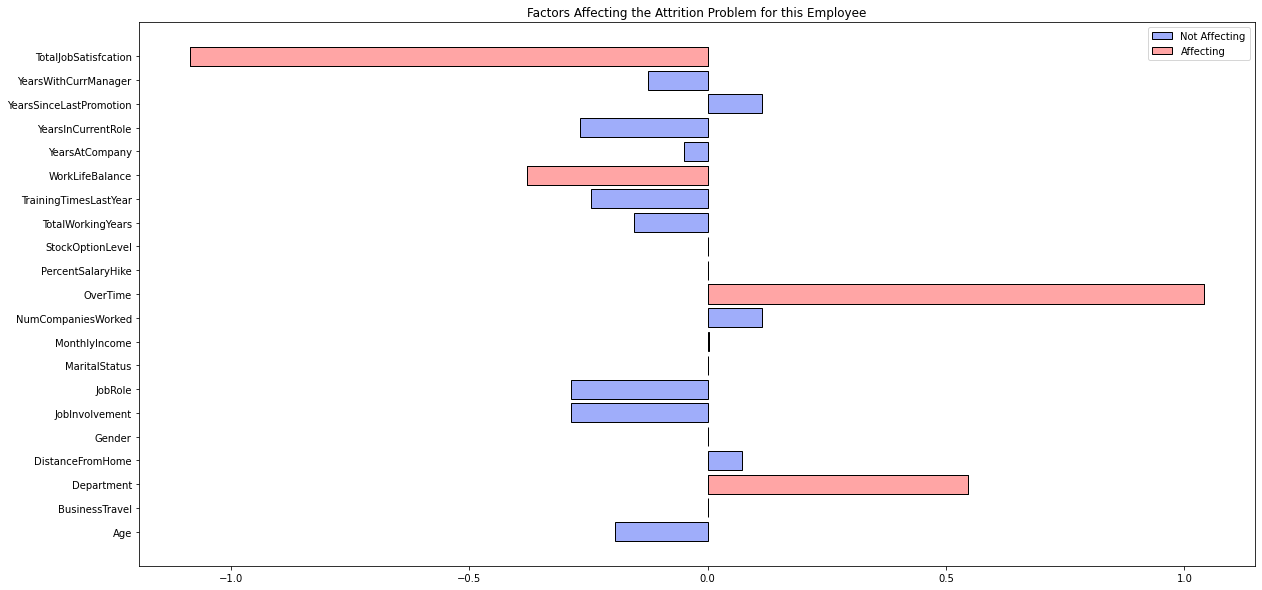

In [692]:
plt.figure(figsize=(20,10))
mutiplication = list(X_test.iloc[0])*svc.coef_[0]
mutiplication_abs = np.abs(mutiplication)
indexes = np.where(mutiplication_abs >= 0.3)
plt.barh(X_train.columns,mutiplication, color = '#9fadfa', linewidth = 1, edgecolor = 'black')
plt.barh(X_train.columns[indexes],mutiplication[indexes], color = '#FFa5a5', linewidth = 1, edgecolor = 'black')
plt.legend(['Not Affecting', 'Affecting'])
plt.title('Factors Affecting the Attrition Problem for this Employee')
plt.savefig('Factors.png')